## Esercitazione 6 - 26 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`, `corde.py`, `secanti.py`,`newton.py` che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tol: tolleranza per il test di arresto.
    Nel caso del metodo di bisezione e di falsa posizione si considera per il test di arresto l’ampiezza del sottointervallo confrontata con tolx.
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `corde.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il coefficiente angolare comune a tutte le rette
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk
La funzione `newton.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  il nome `fpname` della derivata prima della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tols
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `secanti.py` deve assumere come input:

-  due iterati iniziali x_1, x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:         
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

$$
\begin{align}
&1 : e^{-x} - (x + 1) \\
&2:  \frac{\log(x + 3)}{\log(2)} - 2\\
&3: \sqrt{x} - \frac{x^2}{4} \\
\end{align}
$$

 Confrontare i metodi sopra implementati nei casi seguenti:

- f(x) = exp(−x) − (x + 1) in [−1, 2] con x0 = −0.5, x−1 = −0.3, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2] con x0 = −0.5, x−1 = 0.5, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3] con x0 = 1.8, x−1 = 1.5, tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei
tre casi.
Calcolare infine, a partire dai valori di {xk} con k sufficientemente grande, la stima dell’ordine di convergenza p come

p= ln (|x_{k+1}-x_k|/|x_k-x_{k-1}|)/ln (|x_k-x_{k-1}|/|x_{k-1}-x_{k-2}|)

In [202]:
import numpy as np
import sympy as sym

import numpy.linalg as npl
import matplotlib.pyplot as plt
import math

import sys, os
sys.path.append(os.path.abspath('../Scheletri'))

# Step 2: Import the functions or classes from Schel_FULL
import Schel_FULL as sf


In [203]:
x = sym.symbols('x')

scelta = 1
if scelta == 1 :
    f_sym= sym.exp(-x)-(x+1)  

    sol_exact = 0
    a = -1
    b = 2
    x0 = - 0.5
    xm1 = - 0.3

if scelta == 2 :
    f_sym= (sym.log(x+3))/sym.log(2) -2   

    sol_exact = 1
    a = - 1
    b = 2
    x0 = - 0.5
    xm1 = 0.5

if scelta == 3 :
    f_sym= sym.sqrt(x) - (x**2)/4  

    sol_exact = 2**(4/3)
    a = 1
    b = 3
    x0 = 1.8
    xm1 = 1.5
 
fd_sym = sym.diff(f_sym, x)

f = sym.lambdify(x, f_sym, np)
fd = sym.lambdify(x, fd_sym, np)


tolx = 1e-12
tolf = 1e-12
nmax = 1000

zero_bis, num_it_bis, vec_sol_bis = sf.metodo_bisezione(f, a,b, tolx, tolf )
vec_sol_bis=np.array(vec_sol_bis)
err_vec_bis = np.abs(vec_sol_bis - sol_exact)

zero_sec, num_it_sec, vec_sol_sec = sf.secanti(f, a, b, tolx, tolf, nmax)
vec_sol_sec=np.array(vec_sol_sec)
err_vec_sec = np.abs(vec_sol_sec - sol_exact)

zero_falsi, num_it_falsi, vec_sol_falsi = sf.falsi(f, a, b , nmax ,tolx,tolf)
vec_sol_falsi=np.array(vec_sol_falsi)
err_vec_falsi = np.abs(vec_sol_falsi - sol_exact)


In [204]:
x0 = -0.5

zero_newton, num_it_newton, vec_sol_newton = sf.newton(f,fd, x0, tolx, tolf, nmax)
vec_sol_newton=np.array(vec_sol_newton)
err_vec_newton = np.abs(vec_sol_newton - sol_exact)

m = (f(b)-f(a))/(b-a)

zero_corde, num_it_corde, vec_sol_corde = sf.corde(f,m,x0, tolx, tolf, nmax)
vec_sol_corde=np.array(vec_sol_corde)
err_vec_corde = np.abs(vec_sol_corde - sol_exact)

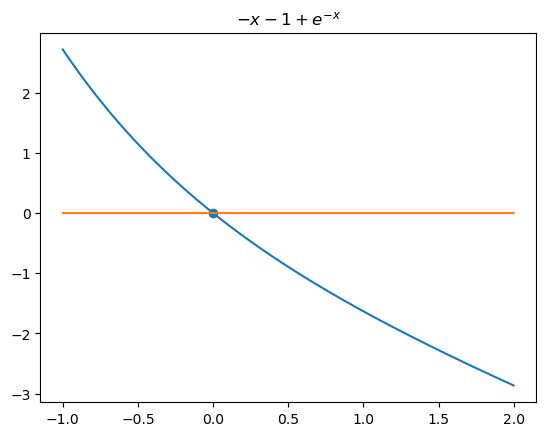

In [205]:
xx = np.linspace(a,b, abs(b-a)*1000)
yy = f(xx)

plt.plot(xx,yy)
plt.plot(xx,np.zeros_like(xx))
plt.scatter(zero_corde, 0)
plt.title(rf"${sym.latex(f_sym)}$")
plt.show()

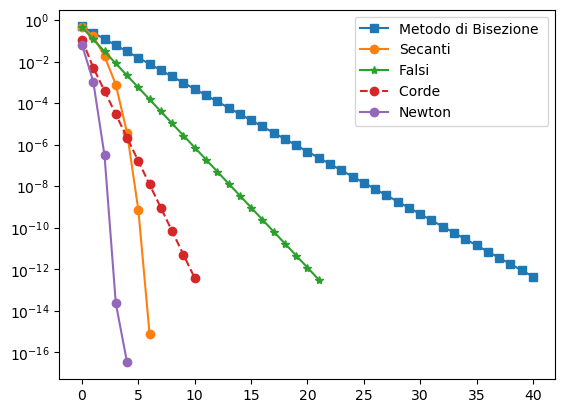

In [206]:
plt.semilogy(range(num_it_bis), err_vec_bis, '-s')
plt.semilogy(range(num_it_sec), err_vec_sec, '-o')
plt.semilogy(range(num_it_falsi), err_vec_falsi, '-*')
plt.semilogy(range(num_it_corde), err_vec_corde, 'o--')
plt.semilogy(range(num_it_newton), err_vec_newton, '-o')

plt.legend(["Metodo di Bisezione ", "Secanti", "Falsi ", "Corde ", "Newton"])
plt.show()

## Esercizio 2
Utilizzare il metodo di Newton e il metodo di Newton modificato per il calcolo
dello zero di molteplicita' 2 della funzione f(x) = 
x^3 + x^2− 33x + 63 con x0 = 1,
tolx = 1.e − 12 e tolf = 1.e − 12. Calcolare infine, a partire dai valori di {xk}
ottenuti nei due casi, la stima dell’ordine di convergenza p.

In [207]:
f_sym = x**3 + x**2 - 33*x + 63
fd_sym = sym.diff(f_sym, x)
x0 = 1
m  = 2

f = sym.lambdify(x, f_sym, np)
fd = sym.lambdify(x, fd_sym, np)

zero_newton, num_it_newton, vec_sol_newton = sf.newton(f, fd, x0, tolx, tolf, nmax)
vec_sol_newton = np.array(vec_sol_newton)


zero_newtonMod, num_it_newtonMod, vec_sol_newtonMod = sf.newton_mod(f, fd,m, x0, tolx, tolf, nmax)
vec_sol_newtonMod = np.array(vec_sol_newtonMod)

stima_newton = sf.stima_ordine(vec_sol_newton, num_it_newton)
stima_newtonMod = sf.stima_ordine(vec_sol_newtonMod, num_it_newtonMod)

print("Zero Newton a partire da x0=1.0 ---",zero_newton, "Numero di iterazioni ",num_it_newton)
print("Zero Newton MOD a partire da x0=1.0 ---",zero_newtonMod, "Numero di iterazioni ",num_it_newtonMod)
print("Stima ordine metodo di newton :", stima_newton)
print("Stima ordine metodo di newton MOD :", stima_newtonMod)




Zero Newton a partire da x0=1.0 --- 2.9999999054103594 Numero di iterazioni  24
Zero Newton MOD a partire da x0=1.0 --- 2.9999999996871622 Numero di iterazioni  4
Stima ordine metodo di newton : 1.021338197375246
Stima ordine metodo di newton MOD : 1.9965427710643453


## Esercizio 3
Utilizzare il metodo di bisezione ed il metodo di Newton per calcolare la radice quadrata di 2. Analizzate i risultati.

In [208]:
f_sym = x**2 - 2
fd_sym = sym.diff(f_sym, x)

f = sym.lambdify(x, f_sym, np)
fd = sym.lambdify(x, fd_sym, np)

sqrt_of_2, num_it, vec_sol = sf.newton(f, fd, x0, tolx, tolf, nmax)

print(sqrt_of_2)

1.414213562373095


## Esercizio 4

Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.


Risolvere i seguenti tre sistemi non lineari:


$$
\begin{align}

&1 = 
\begin{cases}
2x_{0} - \cos(x_{1}) = 0 \\
\sin(x_{0})+2x_{1} = 0 
\end{cases} \\  
&2 = 
\begin{cases}
x_0^2+x_1^2-9=0 \\
x_0^2+2x_1-2=0
\end{cases} \\
&3 = 
\begin{cases}
4x_0^2+x_1^2=4 \\

x_0+x_1= \sin(x_0-x_1)
\end{cases} \\
\end{align}
$$


Per determinare l'iterato iniziale $x_0$ , servirsi del metodo grafico per individuare un 
iterato iniziale nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici $z = f(x_1 ,x_2 )$ e $z = h(x_1 , x_2 )$ e 
definire come iterato iniziale un vettore $x_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 
 

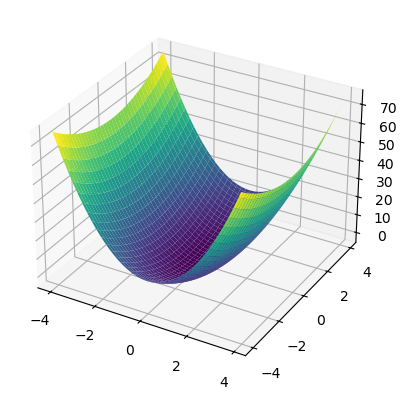

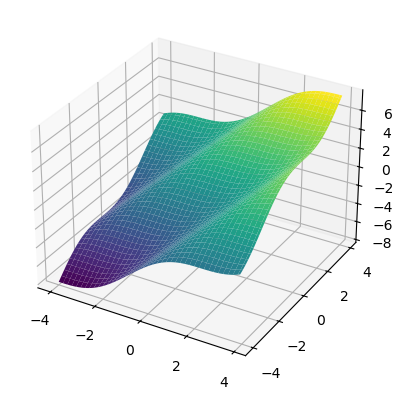

In [209]:
x = sym.symbols('x[1] x[2]')

scelta = 3

xx = np.arange(-4, 4, 0.1)
yy = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(xx,yy)

if scelta == 1 :
    f_sym= sym.Matrix([
        2*x[0] - sym.cos(x[1]),
        sym.sin(x[0]) + 2*x[1]
    ]) 

if scelta == 2 :
    f_sym= sym.Matrix([
        x[0]**2 + x[1]**2 - 9,
        x[0]**2 +2*x[1]-2
    ]) 
if scelta == 3 :
    f_sym= sym.Matrix([
        4*x[0]**2 + x[1]**2 - 4,
        x[0] + x[1] - sym.sin(x[0]-x[1])
    ]) 

fun1 = f_sym[0]
fun2 = f_sym[1]

# Conversione delle funzioni simboliche in lambda function
fun1 = sym.lambdify(x,fun1)
fun2 = sym.lambdify(x, fun2)

jac_sym = f_sym.jacobian(x)
jac_not_np = sym.lambdify((x[0],x[1]), jac_sym, np)
jac = lambda x : np.array( jac_not_np(x[0], x[1]))

# Conversione della funzione simbolica F in lambda function
F_np = sym.lambdify((x[0], x[1]), f_sym, np)
F = lambda x: np.array(F_np(x[0], x[1])).flatten()

Z1, Z2 = fun1(X, Y), fun2(X, Y)

# Plot delle superfici
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, cmap=plt.cm.viridis)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z2, cmap=plt.cm.viridis)
plt.show()




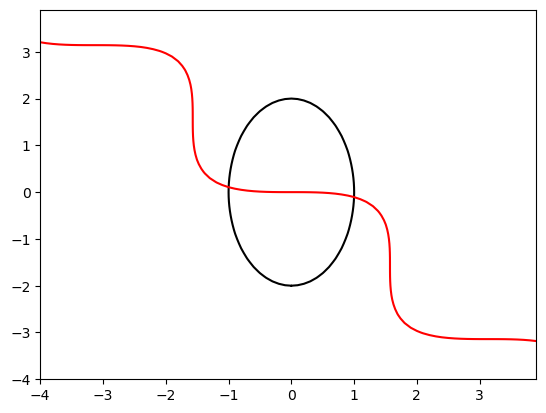

In [210]:
plt.contour(X, Y, Z1, levels=[0], colors='black')
plt.contour(X, Y, Z2, levels=[0], colors='red')
 
plt.show()

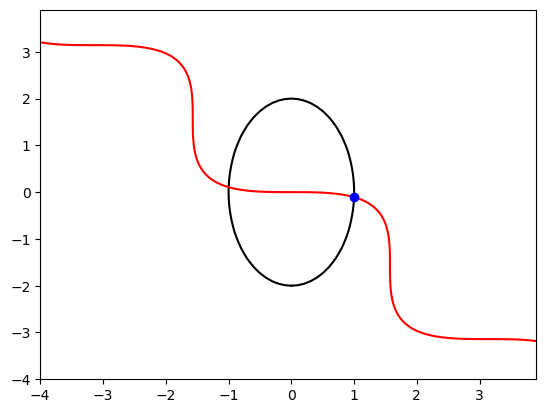

In [211]:
x0 = np.array([1, 0])

nmax = 1000

sol_raph, num_it_raph, err_vec_raph = sf.my_newtonSys(F, jac, x0, tolx, tolx, nmax)

sol_corde, num_it_corde, err_vec_corde = sf.my_newtonSys_corde(F, jac, x0, tolx, tolx, nmax)

sol_sham, num_it_sham, err_vec_sham = sf.my_newtonSys_sham(F, jac, x0, tolx, tolx, nmax)

plt.contour(X, Y, Z1, levels=[0], colors='black')
plt.contour(X, Y, Z2, levels=[0], colors='red')
plt.plot(sol_corde[0], sol_corde[1], 'bo') 
plt.show()


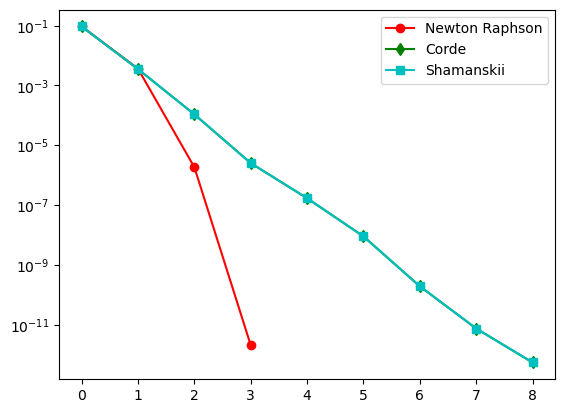

In [212]:
plt.semilogy(range(num_it_raph),err_vec_raph,'r-o',range(num_it_corde),err_vec_corde,'g-d',range(num_it_sham),err_vec_sham,'c-s')
plt.legend(['Newton Raphson','Corde','Shamanskii'])